# IBM HR Analytics

I have used this awesome dataset to compare some cool Ensemble Learning techniques like:
#### Bagging
#### Boosting
#### Gradient Boosting
#### Extreme Gradient Boosting

[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')
df.pop('EmployeeCount')

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
1460    1
1461    1
1462    1
1463    1
1464    1
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 31)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [8]:
y = df['Attrition']
tmp = df['Attrition']
X = df
X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15       No
16       No
17       No
18       No
19       No
20       No
21      Yes
22       No
23       No
24      Yes
25       No
26      Yes
27       No
28       No
29       No
       ... 
1440     No
1441     No
1442    Yes
1443     No
1444    Yes
1445     No
1446     No
1447     No
1448     No
1449     No
1450     No
1451     No
1452    Yes
1453     No
1454     No
1455     No
1456     No
1457     No
1458     No
1459     No
1460     No
1461    Yes
1462     No
1463     No
1464     No
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [9]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [12]:
y = le.fit_transform(y)

In [13]:
y.shape

(1470, 1)

In [14]:
tmp = le.fit_transform(tmp)

In [15]:
type(tmp)

numpy.ndarray

In [16]:
tmp = pd.Series(list(tmp))

In [17]:
tmp.value_counts()

[0]    1233
[1]     237
dtype: int64

In [18]:
tmp.value_counts() / tmp.count()

[0]    0.838776
[1]    0.161224
dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime               

In [20]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


In [21]:
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'], prefix='Department')
ind_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField')
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime')

In [22]:
ind_BusinessTravel.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [23]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [26]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, ind_OverTime], sort=True)

In [27]:
df.select_dtypes(['int64'])

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
5,32,1005,2,2,4,79,3,1,4,3068,...,3,3,0,8,2,2,7,7,3,6
6,59,1324,3,3,3,81,4,1,1,2670,...,4,1,3,12,3,2,1,0,0,0
7,30,1358,24,1,4,67,3,1,3,2693,...,4,2,1,1,2,3,1,0,0,0
8,38,216,23,3,4,44,2,3,3,9526,...,4,2,0,10,2,3,9,7,1,8
9,36,1299,27,3,3,94,3,2,3,5237,...,3,2,2,17,3,2,7,7,7,7


In [28]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, ind_OverTime, df.select_dtypes(['int64'])], axis=1)

In [29]:
df1.shape

(1470, 51)

# Decision Tree

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf = DecisionTreeClassifier(random_state=42)

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [34]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [36]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       917
          1       1.00      1.00      1.00       185

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[917   0]
 [  0 185]]

Average Accuracy: 	 0.7722
Accuracy SD: 		 0.0420


In [37]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7880

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.87      0.88       316
          1       0.28      0.31      0.29        52

avg / total       0.80      0.79      0.79       368


Confusion Matrix: 
 [[274  42]
 [ 36  16]]



The result is clearly not satisfactory. We will revisit this project after we covered ensemble model.

****

# Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                            bootstrap=True, n_jobs=-1, random_state=42)

In [40]:
bag_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [41]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       917
          1       1.00      1.00      1.00       185

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[917   0]
 [  0 185]]

Average Accuracy: 	 0.8476
Accuracy SD: 		 0.0178
Test Result:

accuracy score: 0.8723

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.97      0.93       316
          1       0.60      0.29      0.39        52

avg / total       0.85      0.87      0.85       368


Confusion Matrix: 
 [[306  10]
 [ 37  15]]



***

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_clf = RandomForestClassifier(n_estimators=500)

In [44]:
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       917
          1       1.00      1.00      1.00       185

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[917   0]
 [  0 185]]

Average Accuracy: 	 0.8557
Accuracy SD: 		 0.0131
Test Result:

accuracy score: 0.8859

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.99      0.94       316
          1       0.78      0.27      0.40        52

avg / total       0.88      0.89      0.86       368


Confusion Matrix: 
 [[312   4]
 [ 38  14]]



In [46]:
import seaborn as sns

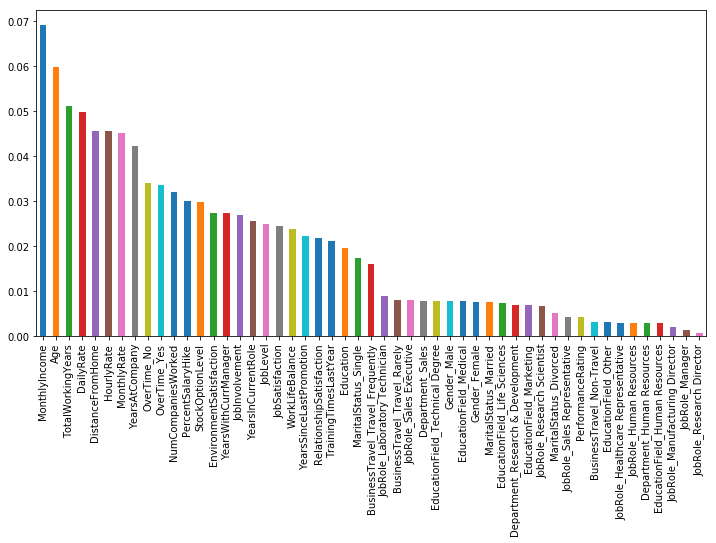

In [47]:
pd.Series(rf_clf.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
ada_clf = AdaBoostClassifier()

In [50]:
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [51]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9111

Classification Report: 
              precision    recall  f1-score   support

          0       0.92      0.98      0.95       917
          1       0.86      0.56      0.68       185

avg / total       0.91      0.91      0.90      1102


Confusion Matrix: 
 [[900  17]
 [ 81 104]]

Average Accuracy: 	 0.8713
Accuracy SD: 		 0.0235
Test Result:

accuracy score: 0.8696

Classification Report: 
              precision    recall  f1-score   support

          0       0.91      0.94      0.93       316
          1       0.55      0.42      0.48        52

avg / total       0.86      0.87      0.86       368


Confusion Matrix: 
 [[298  18]
 [ 30  22]]



***

# AdaBoost + RandomForest

In [52]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [53]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       917
          1       1.00      1.00      1.00       185

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[917   0]
 [  0 185]]

Average Accuracy: 	 0.8458
Accuracy SD: 		 0.0156
Test Result:

accuracy score: 0.8614

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.97      0.92       316
          1       0.53      0.17      0.26        52

avg / total       0.83      0.86      0.83       368


Confusion Matrix: 
 [[308   8]
 [ 43   9]]



***

# Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [56]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9655

Classification Report: 
              precision    recall  f1-score   support

          0       0.96      1.00      0.98       917
          1       0.98      0.81      0.89       185

avg / total       0.97      0.97      0.96      1102


Confusion Matrix: 
 [[914   3]
 [ 35 150]]

Average Accuracy: 	 0.8648
Accuracy SD: 		 0.0157
Test Result:

accuracy score: 0.8723

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.97      0.93       316
          1       0.59      0.31      0.41        52

avg / total       0.85      0.87      0.85       368


Confusion Matrix: 
 [[305  11]
 [ 36  16]]



***

# XGBoost

In [57]:
import xgboost as xgb

In [58]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [62]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9501

Classification Report: 
              precision    recall  f1-score   support

          0       0.95      1.00      0.97       917
          1       0.99      0.71      0.83       185

avg / total       0.95      0.95      0.95      1102


Confusion Matrix: 
 [[915   2]
 [ 53 132]]

Average Accuracy: 	 0.8649
Accuracy SD: 		 0.0221
Test Result:

accuracy score: 0.8750

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.97      0.93       316
          1       0.62      0.31      0.41        52

avg / total       0.86      0.88      0.86       368


Confusion Matrix: 
 [[306  10]
 [ 36  16]]



# Best Results?

Although **XGBoost** offers some great results but **Random Forest Classifier** wins the race with 88.59% Accuracy Score and 86% F1-score.